# Milka Vladislav

In [1]:
N = ord("V") % 3 + 1
N

3

## Варіант 3. Дослідження втрат бронетранспортерів (БТР).

1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).
3. Знайдіть добові втрати БТР.
4. Знайдіть 5 найбільших добових втрат БТР.
5. Визначте, скільки БТР було знищено влітку 2023 року.
6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Функція для отримання стовпця з CSV файлу
def get_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = [float(row[column_name]) for row in reader]
    return np.array(data)

In [4]:
# Завдання 2: Отримання масиву значень стовпця "APC"
filename = 'russia_losses_equipment.csv'
apc_losses = get_column(filename, 'APC')
apc_losses = np.insert(apc_losses, 0, 0)

In [5]:
# Завдання 3: Знайдення добових втрат БТР
daily_losses = np.diff(apc_losses)
np.set_printoptions(formatter={'float_kind': '{:0.0f}'.format})
print("Завдання 3: Добові втрати БТР")
print(daily_losses)

Завдання 3: Добові втрати БТР
[516 190 0 110 30 16 38 39 6 40 14 37 34 35 60 40 21 23 30 96 60 13 22 17
 48 21 22 19 28 15 24 30 16 13 12 16 25 54 14 14 3 30 0 4 16 12 23 18 4 8
 6 20 39 22 24 31 44 43 33 20 50 34 47 29 27 26 48 48 43 41 35 27 28 23 44
 48 17 27 34 24 16 35 34 20 27 26 25 25 28 19 22 11 12 12 12 20 41 11 12
 13 13 8 16 13 9 12 16 18 8 11 25 17 18 10 4 11 18 8 18 5 8 14 28 17 16 6
 10 1 7 0 28 17 8 14 4 8 5 1 3 0 34 8 5 7 6 13 7 8 9 13 8 9 12 8 8 8 9 7 3
 8 4 6 19 4 15 6 10 14 8 7 11 15 11 10 17 16 17 12 6 8 5 2 6 3 3 12 25 18
 33 21 37 27 29 25 36 37 18 9 33 23 22 3 17 8 11 17 2 4 24 28 20 11 25 25
 24 8 20 23 17 26 16 27 20 26 29 18 22 16 13 19 -14 5 7 14 12 14 16 20 3 8
 18 11 26 30 13 14 23 52 32 16 24 27 28 21 10 19 24 12 16 14 34 12 6 25 24
 7 4 7 2 5 5 5 5 7 4 8 5 5 6 5 6 3 6 8 5 4 2 1 5 3 8 2 7 9 6 6 5 6 5 5 2 5
 8 16 7 7 13 10 12 16 9 9 7 6 2 16 1 5 17 7 5 0 8 6 10 21 11 0 20 6 15 12
 8 8 23 27 6 4 22 3 9 4 0 6 6 11 10 28 15 10 3 3 14 4 8 7 10 3 13 12 8 9 7
 24

In [6]:
# Завдання 4: Знайдення 5 найбільших добових втрат БТР
top_5_daily_losses = np.partition(daily_losses, -5)[-5:]
print("Завдання 4: 5 найбільших добових втрат БТР")
print(top_5_daily_losses)

Завдання 4: 5 найбільших добових втрат БТР
[96 110 120 190 516]


In [7]:
# Завдання 5: Визначення кількості БТР, знищених влітку 2023 року

from datetime import datetime

def get_column_string(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = [row[column_name] for row in reader]
    return np.array(data)

dates = get_column_string(filename, 'date')
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

start_of_summer = datetime(2023, 6, 1)
end_of_summer = datetime(2023, 8, 31)

summer_indices = [i for i, date in enumerate(dates) if start_of_summer <= date <= end_of_summer]

# Determine the number of APCs destroyed during the summer of 2023
summer_losses = apc_losses[summer_indices[-1]] - apc_losses[summer_indices[0]]
summer_losses = int(summer_losses)
print("Завдання 5: Визначте, скільки БТР було знищено влітку 2023 року.")
print(summer_losses)

Завдання 5: Визначте, скільки БТР було знищено влітку 2023 року.
1124


In [8]:
# Завдання 6: Знайдення середнього значення знищених БТР за 100-500 днів війни

day_500_losses = apc_losses[500]  # Кількість на 500-му дні
day_100_losses = apc_losses[100]  # Кількість на 100-му дні
days_between = 500 - 100 + 1  # Кількість днів між 100 та 500 днями

average_losses_100_to_500 = (day_500_losses - day_100_losses) / days_between
print("Завдання 6: Середнє значення знищених БТР за 100-500 днів війни")
print(average_losses_100_to_500)



Завдання 6: Середнє значення знищених БТР за 100-500 днів війни
11.433915211970074


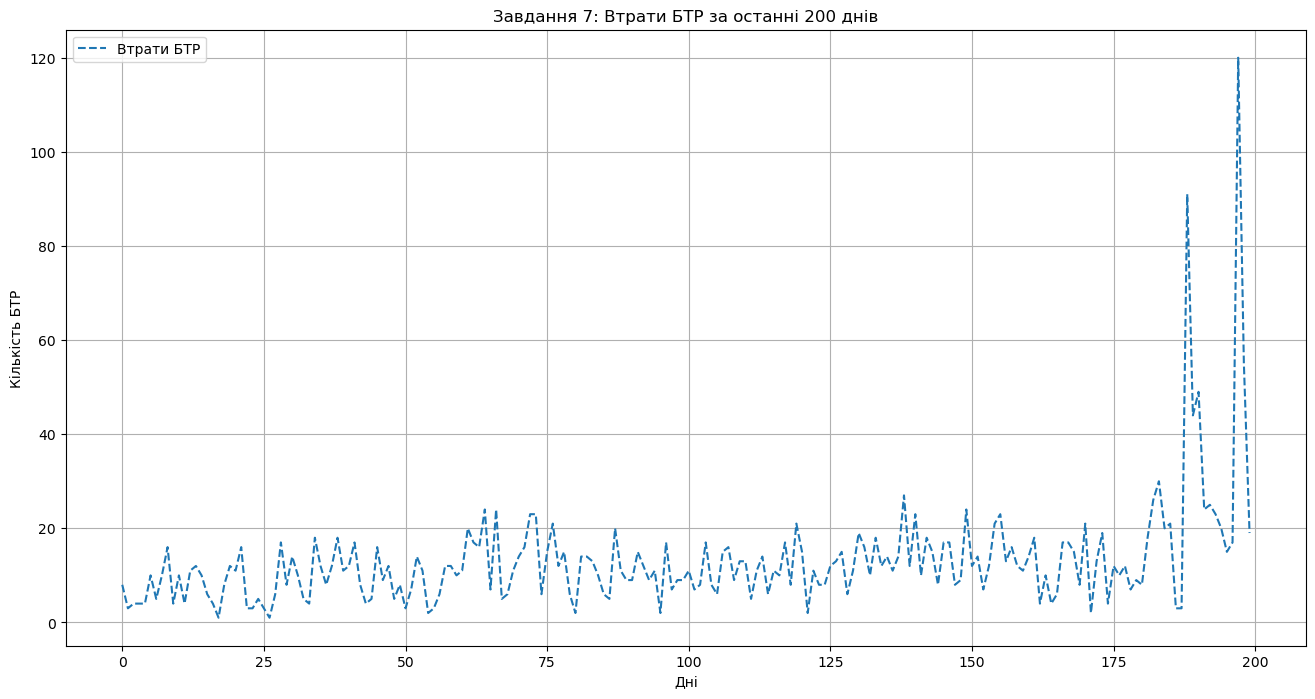

In [9]:
# Завдання 7: Створення графіку втрат БТР за останні 200 днів
last_201_days_losses = apc_losses[-201:]  # Враховуємо 201 день
daily_losses = np.diff(last_201_days_losses) 
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(daily_losses, linestyle='--',label='Втрати БТР')
plt.title('Завдання 7: Втрати БТР за останні 200 днів')
plt.xlabel('Дні')
plt.ylabel('Кількість БТР')
plt.legend()
plt.grid(True)
plt.savefig('apc_losses.png', dpi=100)
plt.show()